# Analyzing the Image and Network Layers

## Stepping through the layer of a CNN to see what is happening to the images

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
%matplotlib inline
pd.set_option("display.max_columns", None)

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


### Load in Image and view it

In [108]:
img = cv2.imread('C:\\Users\\jltsa\\Desktop\\Project_2\\images\\poison_oak\\50_poisonoak.jpg',cv2.IMREAD_COLOR)

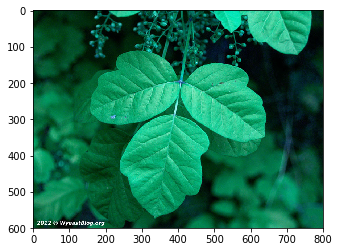

In [109]:
plt.imshow(img)
plt.show()

In [110]:
img.shape

(600, 800, 3)

### Reference to AlexNet architecture

In [111]:
class AlexNet:
    #optimizer to use should be 'sgd'
    @staticmethod
    def build(width, height, depth, classes):
        model = Sequential()
        #input shape is 227x227x3
        inputShape = (height, width, depth)
        model.add(Conv2D(filters=96, kernel_size=11, strides=4,
                         input_shape=inputShape, activation='relu'))
        model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
        model.add(Conv2D(filters=256, kernel_size=5, strides=1,
                         padding='same', activation='relu'))
        model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
        model.add(Conv2D(filters=384, kernel_size=3, strides=1,
                         padding='same', activation='relu'))
        model.add(Conv2D(filters=256, kernel_size=3, strides=1,
                         padding='same', activation='relu'))
        model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
        model.add(Flatten())
        model.add(Dense(4096, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(4096, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(classes, activation='softmax'))
        
        return model

## Convolutional Layer

In [121]:
#1 convolutional layer with 3 filters, with a 3x3 kernel
model = Sequential()
model.add(Conv2D(3,3,3,input_shape=img.shape))

C:\Users\jltsa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (3, 3), input_shape=(600, 800,...)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [113]:
#Keras expects teh images in batches, so we add another dimension for it
add_batch_img = np.expand_dims(img, axis=0)

In [114]:
add_batch_img.shape

(1, 600, 800, 3)

In [115]:
conv_img = model.predict(add_batch_img)

In [116]:
#plotting the image
def visualize(image):
    #get rid of added dimension
    img = np.squeeze(image, axis=0)
    print(image.shape)
    plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 598, 798, 3)


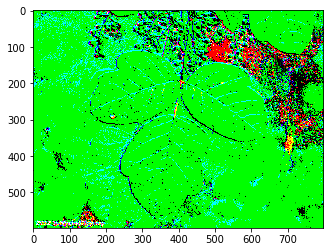

In [117]:
#the kernels are randomized at the time the Conv2D layer is added
visualize(conv_img)

C:\Users\jltsa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (3, 3), input_shape=(600, 800,...)`
  
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 598, 798, 3)


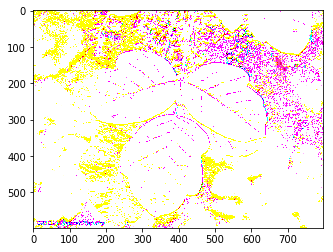

In [126]:
#Run this cell multiple times to see how to output changes as the kernels change
#You will see how different features are noticed
model2 = Sequential()
model2.add(Conv2D(3,3,3,input_shape=img.shape))
img2 = cv2.imread('C:\\Users\\jltsa\\Desktop\\Project_2\\images\\poison_oak\\50_poisonoak.jpg',cv2.IMREAD_COLOR)
add_batch_img2 = np.expand_dims(img2, axis=0)
conv_img2 = model2.predict(add_batch_img2)
visualize(conv_img2)